In [2]:
from math import *
from pylab import *

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import time

import redpitaya_scpi as scpi

### 1. Calculations

In [3]:
BITS_PER_SAMPLE = 32        # bits
SAMPLE_RATE     = 125e6     # Hz

In [4]:
maxMemBytes = 16**5 * 2
maxNumMemSamples = maxMemBytes * 8 / BITS_PER_SAMPLE

print('Per channel:')
print('Max memory allocated  = {:>8} = 16^{:<2} bytes'.format(int(maxMemBytes), log2(maxMemBytes)/log2(16)))
print('Max number of samples = {:>8} =  2^{:<2}'.format(int(maxNumMemSamples), log2(maxNumMemSamples)))

Per channel:
Max memory allocated  =  2097152 = 16^5.25 bytes
Max number of samples =   524288 =  2^19.0


In [5]:
signalPeriod = maxNumMemSamples / SAMPLE_RATE
signalFrequency = 1 / signalPeriod

print('Singal period   = {:>10.5f} μs'.format(signalPeriod * 1e6))
print('Signal frequncy = {:>10.5f} Hz'.format(signalFrequency))

Singal period   = 4194.30400 μs
Signal frequncy =  238.41858 Hz


### 2. Deep Memory Acquisition via SCPI Server

In [6]:
# ## CONNECTION
# IP = '192.168.234.234'      # local IP of Red Pitaya
# rp_s = scpi.scpi(IP)        # open socket connection with Red Pitaya

# ## RESET ACQUISITION
# rp_s.tx_txt('ACQ:RST')

In [7]:
# ## CONFIGURATION

# ## number of samples (per channel) to write/read
# DATA_SIZE = maxNumMemSamples
# # READ_DATA_SIZE  = maxNumMemSamples
# READ_DATA_SIZE  = 2**14   # 16384

# ## signal units
# # units = 'RAW'
# units = 'VOLTS'

# ## decimation
# dec = 1

# ## trigger
# # trig_lvl = 0
# trig_src = 'NOW'
# # trig_src = 'CH1_PE'
# # trig_src = 'CH2_PE'

In [8]:
# # get memory region
# size = int(rp_s.txrx_txt('ACQ:AXI:SIZE?'))
# start_address_a = int(rp_s.txrx_txt('ACQ:AXI:START?'))
# start_address_b = round(start_address_a + size/2)

# print('Net size of memory region  = 0x{:07X} bytes'.format(size))
# print('Start address Channel A    = 0x{:07X}'.format(start_address_a))
# print('Start address Channel B    = 0x{:07X}'.format(start_address_b))

In [9]:
# # set decimatin
# rp_s.tx_txt(f'ACQ:AXI:DEC {dec}')

# # set units
# rp_s.tx_txt(f'ACQ:AXI:DATA:UNITS {units}')

# # set trigger delay for both channels
# rp_s.tx_txt(f'ACQ:AXI:SOUR1:Trig:Dly {DATA_SIZE}')
# rp_s.tx_txt(f'ACQ:AXI:SOUR2:Trig:Dly {DATA_SIZE}')

# # set DMA buffer address and size in bytes
# rp_s.tx_txt(f'ACQ:AXI:SOUR1:SET:Buffer {start_address_a},{size/2}')
# rp_s.tx_txt(f'ACQ:AXI:SOUR2:SET:Buffer {start_address_b},{size/2}')

# # enable DMA
# rp_s.tx_txt('ACQ:AXI:SOUR1:ENable ON')
# rp_s.tx_txt('ACQ:AXI:SOUR2:ENable ON')
# print('Channel A and Channel B are enabled')

# # set acquisition trigger
# # rp_s.tx_txt(f'ACQ:TRig:LEV {trig_lvl}')

In [10]:
# ## ACQUISITION

# rp_s.tx_txt('ACQ:START')
# print('Acquisition started')

# # set trigger source
# rp_s.tx_txt(f'ACQ:TRig {trig_src}')

# # wait for trigger
# while 1:
#     rp_s.tx_txt('ACQ:TRig:STAT?')
#     if rp_s.rx_txt() == 'TD':       # 'TD' or 'WAIT'
#         print('Triggered')
#         time.sleep(1)
#         break

# # wait until adc buffer is filled
# while 1:
#     rp_s.tx_txt('ACQ:AXI:SOUR1:TRIG:FILL?')
#     is_full_1 = rp_s.rx_txt()

#     rp_s.tx_txt('ACQ:AXI:SOUR2:TRIG:FILL?')
#     is_full_2 = rp_s.rx_txt()

#     if is_full_1 == '1' or is_full_2 == '1':
#         if is_full_1 == '1':
#             print('DMA buffer 1 full')
#         if is_full_2 == '1':
#             print('DMA buffer 2 full')
#         break

# # stop acquisition
# rp_s.tx_txt('ACQ:STOP')
# print('Acquisition stopped')

In [11]:
# ## GET WRITE POINTERS

# posChA = int(rp_s.txrx_txt('ACQ:AXI:SOUR1:Trig:Pos?'))
# posChB = int(rp_s.txrx_txt('ACQ:AXI:SOUR2:Trig:Pos?'))

# print('Write pointers (at trigger locations):')
# print('Channel A = 0x{:07X}'.format(posChA))
# print('Channel B = 0x{:07X}'.format(posChB))

In [12]:
# ## READ & PROCESS DATA

# rp_s.tx_txt(f'ACQ:AXI:SOUR1:DATA:Start:N? {posChA},{READ_DATA_SIZE}')
# signal_str_a = rp_s.rx_txt()

# rp_s.tx_txt(f'ACQ:AXI:SOUR2:DATA:Start:N? {posChB},{READ_DATA_SIZE}')
# signal_str_b = rp_s.rx_txt()

# signal_num_a = signal_str_a.strip('{}\n\r').replace('  ', '').split(',')
# signal_num_b = signal_str_b.strip('{}\n\r').replace('  ', '').split(',')

# units_data_type = int if units == 'RAW' else float

# signal_num_a = list(map(units_data_type, signal_num_a))
# signal_num_b = list(map(units_data_type, signal_num_b))

# # convert from lists to numpy arrays
# signal_num_a = np.array(signal_num_a)
# signal_num_b = np.array(signal_num_b)

# print('Data read and processed')

In [13]:
# ## SAVE DATA

# dataFileName = f'noise_{int(READ_DATA_SIZE)}_{int(SAMPLE_RATE/1e6)}MHz_{units.lower()}'

# np.save(f'{dataFileName}_chA.npy', signal_num_a)
# np.save(f'{dataFileName}_chB.npy', signal_num_b)

In [14]:
# ## RELEASE RESOURCES & SEVER CONNECTION

# rp_s.tx_txt('ACQ:AXI:SOUR1:ENable OFF')
# rp_s.tx_txt('ACQ:AXI:SOUR2:ENable OFF')
# rp_s.close()

# print('Resources released')

### 3. Data Analysis

In [30]:
## LOAD .npy DATA FILES

nSamples = maxNumMemSamples
# nSamples = 2**14

# units = 'RAW'
units = 'VOLTS'

filename = f'noise_{int(nSamples)}_{int(SAMPLE_RATE/1e6)}MHz_{units.lower()}'

signal_num_a = np.load(f'{filename}_chA.npy')
signal_num_b = np.load(f'{filename}_chB.npy')

print(f'{filename} data loaded into Numpy arrays')

noise_524288_125MHz_volts data loaded into Numpy arrays


In [31]:
# data properties
nSamples = len(signal_num_a)
tSamples = (nSamples / SAMPLE_RATE)     # sampling time (in seconds)

t = np.linspace(0, tSamples, nSamples)

#### 3.1 Noise Distribution

In [32]:
## CONFIGURATION

R = 50  # resistance (in Ohms)

nBins = 11
density = True

signal_num = signal_num_a
signal_num_label = 'Channel A'

In [33]:
# set units for plotting
units_plot = ''
if units == 'VOLTS':
    signal_num *= 1e3
    units_plot = 'mV'
elif units == 'RAW':
    units_plot = 'bits'

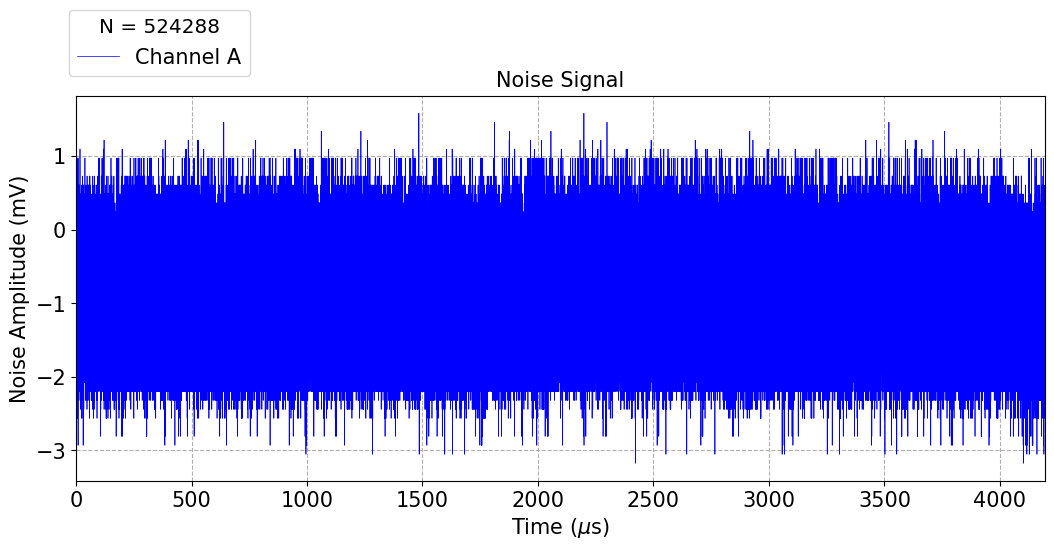

In [34]:
plt.figure(figsize=(12.5, 5))

plt.plot(t*1e6, signal_num, '-b', lw=0.5, label=signal_num_label)

plt.title('Noise Signal', fontsize=15)
plt.xlabel(r'Time ($\mu$s)', fontsize=15)
plt.ylabel(f'Noise Amplitude ({units_plot})', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([0, t[-1]*1e6])

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, title_fontsize='x-large', prop={'size': 15},
        bbox_to_anchor=(0.19, 1.25))

plt.grid(ls='--')
plt.show()

In [35]:
# calculate histogram
hist, bins = np.histogram(signal_num, bins=nBins, density=density)
bin_centers = (bins[1:] + bins[:-1]) * 0.5

# fit Gaussian
mu, sigma = sp.stats.norm.fit(signal_num)
x = np.linspace(bin_centers[0], bin_centers[-1], 100)
p = sp.stats.norm.pdf(x, mu, sigma)

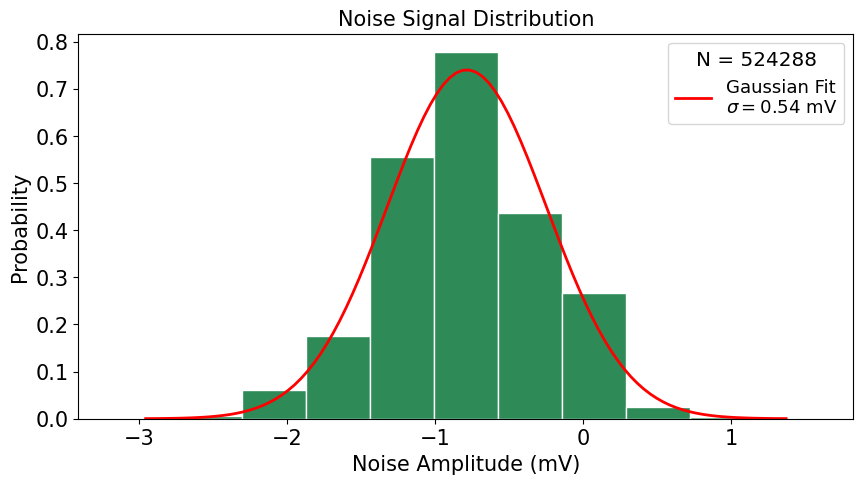

In [36]:
plt.figure(figsize=(10, 5))

plt.hist(signal_num, bins=nBins, density=density, color='seagreen', edgecolor='w')
plt.plot(x, p, '-r', lw=2, label='Gaussian Fit\n'+rf'$\sigma = {sigma:.2f}$ {units_plot}')

plt.title('Noise Signal Distribution', fontsize=15)
plt.xlabel(f'Noise Amplitude ({units_plot})', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 13})

plt.show()

#### 3.2. Fast Fourier Transform

In [37]:
if units == 'RAW' :
    raise SystemExit("Stopped here")

In [38]:
# convert signal back to V from mV
signal_num /= 1e3

In [39]:
# calculate FFT frequency
t_fftfreq = np.fft.fftfreq(nSamples, 1/SAMPLE_RATE)
t_fftfreq_nyq = t_fftfreq[:nSamples // 2]

3.2.2 Spectrum in dBV

In [40]:
signal_num_fft = np.fft.fft(signal_num)
signal_num_fft_nyq = np.abs(signal_num_fft[:nSamples // 2])
signal_num_fft_nyq_db = 10*np.log10(signal_num_fft_nyq)

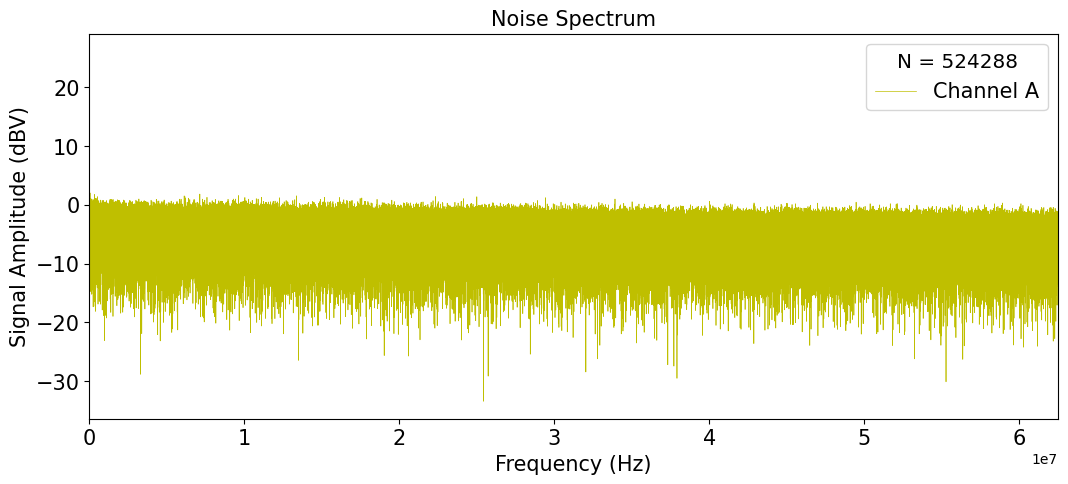

In [41]:
plt.figure(figsize=(12.5, 5))

plt.plot(t_fftfreq_nyq, signal_num_fft_nyq_db, '-y', lw=0.5, label='Channel A')

plt.title('Noise Spectrum', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel(f'Signal Amplitude (dBV)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(min(t_fftfreq_nyq), max(t_fftfreq_nyq))

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 15})

plt.show()

3.2.2 Spectrum in dBm

In [42]:
signal_num_fft = signal_num_fft**2 / R
signal_num_fft_nyq = np.abs(signal_num_fft[:nSamples // 2])
signal_num_fft_nyq_db = 10*np.log10(signal_num_fft_nyq)

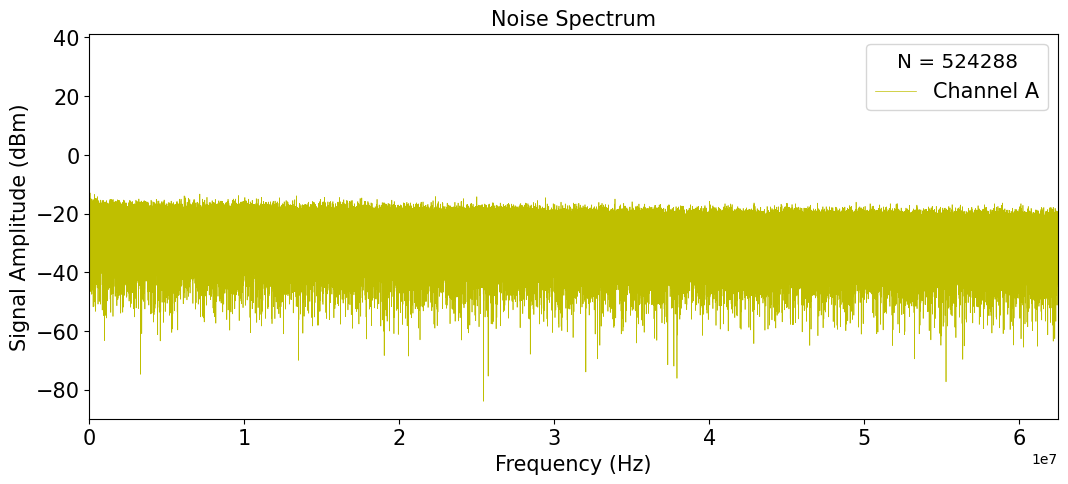

In [43]:
plt.figure(figsize=(12.5, 5))

plt.plot(t_fftfreq_nyq, signal_num_fft_nyq_db, '-y', lw=0.5, label='Channel A')

plt.title('Noise Spectrum', fontsize=15)
plt.xlabel('Frequency (Hz)', fontsize=15)
plt.ylabel(f'Signal Amplitude (dBm)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(min(t_fftfreq_nyq), max(t_fftfreq_nyq))

legendTitle = 'N = {}'.format(nSamples)
plt.legend(title=legendTitle, loc='best', title_fontsize='x-large', prop={'size': 15})

plt.show()